# Single Cell Analysis

This notebook depends on the ImageProcessing notebook to have been run first!

Also, be sure to run this notebook before doing the SpatialAnalysis notebook -- that notebook depends on some of the outputs of this one!

In [1]:
import os
import numpy as np
import pandas as pd
import palmettobug as pbug

The PalmettoBUG package is copyrighted 2024-2025 by the Medical University of South Carolina and licensed under the GPL-3 license.
It is free & open source software, can  be redistributed in compliance with the GPL3 license, and comes with absolutely no warranty.
In python, use palmettobug.print_license() to see the license, or use palmettobug.print_3rd_party_license_info() to print information
about the licenses and copyright of 3rd party software used in PalmettoBUG itself or in the creation of PalmettoBUG.


In [2]:
pbug.__version__

'0.2.11'

### CHANGE The following directory to match an existing directory on your computer if you are testing this tutorial on your own machine!

In [3]:
my_computer_path =  "C:/Users/Default/Desktop"  ## CHANGE This DIRECTORY to match an existing directory on your computer if you testing this tutorial on your own machine!

## Initialize Analysis class

This requires an analysis directory to have been set up previously (as in the image processing notebook)

In [4]:
Analysis_directory = f"{my_computer_path}/Example_IMC/Analyses/MyAmazingAnalysis/main"

In [5]:
'''
Now that the proper analysis directory structure has been made and populated with .fcs files and the metadata and panel files, we can initiate an analysis
'''
Analysis_experiment = pbug.Analysis()
Analysis_experiment.load_data(Analysis_directory)

## Scaling and initial Plots

In [6]:
'''
Will begin by scaling the data
'''
Analysis_experiment.do_scaling("%quantile")

In [7]:
'''Batch Correction and Dropping data is also possible, but I will not do it in this noteboook (uncomment lines below to see what they do)'''
# Analysis_experiment.do_COMBAT(batch_column = "condition")
# Analysis_experiment.filter_data(to_drop = "8", column = "sample_id")

'Batch Correction and Dropping data is also possible, but I will not do it in this noteboook (uncomment lines below to see what they do)'

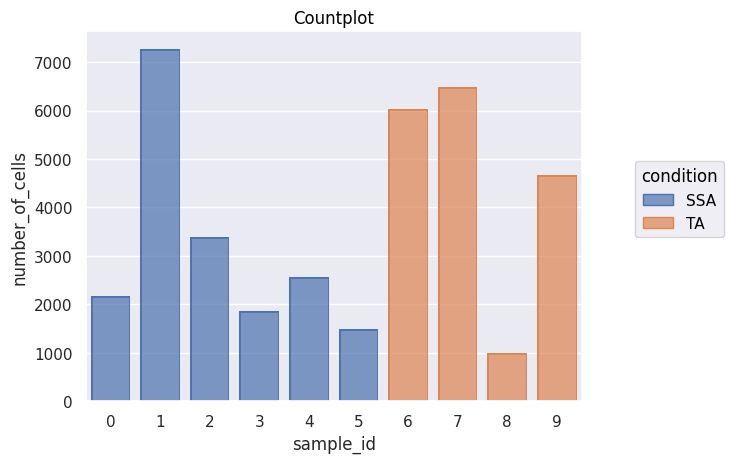

In [8]:
'''
Now let's look at count plots, MDS plots, and the kde histogram tracings of marker expression in each sample_id
'''
fig = Analysis_experiment.plot_cell_counts(group_by = "sample_id", color_by = "condition", filename = "countplot.png")
fig

In [9]:
'''
test_drop = Analysis_experiment.FilterData(sample_id_to_drop = 2, column = "sample_id")                    ### if you want to do more that one at once, you have ot make a loop and iterate (not instant convenience function
fig = Analysis_experiment.plot_cell_counts(group_by = "sample_id", color_by = "condition", filename = "countplot.png")
fig
'''
display()

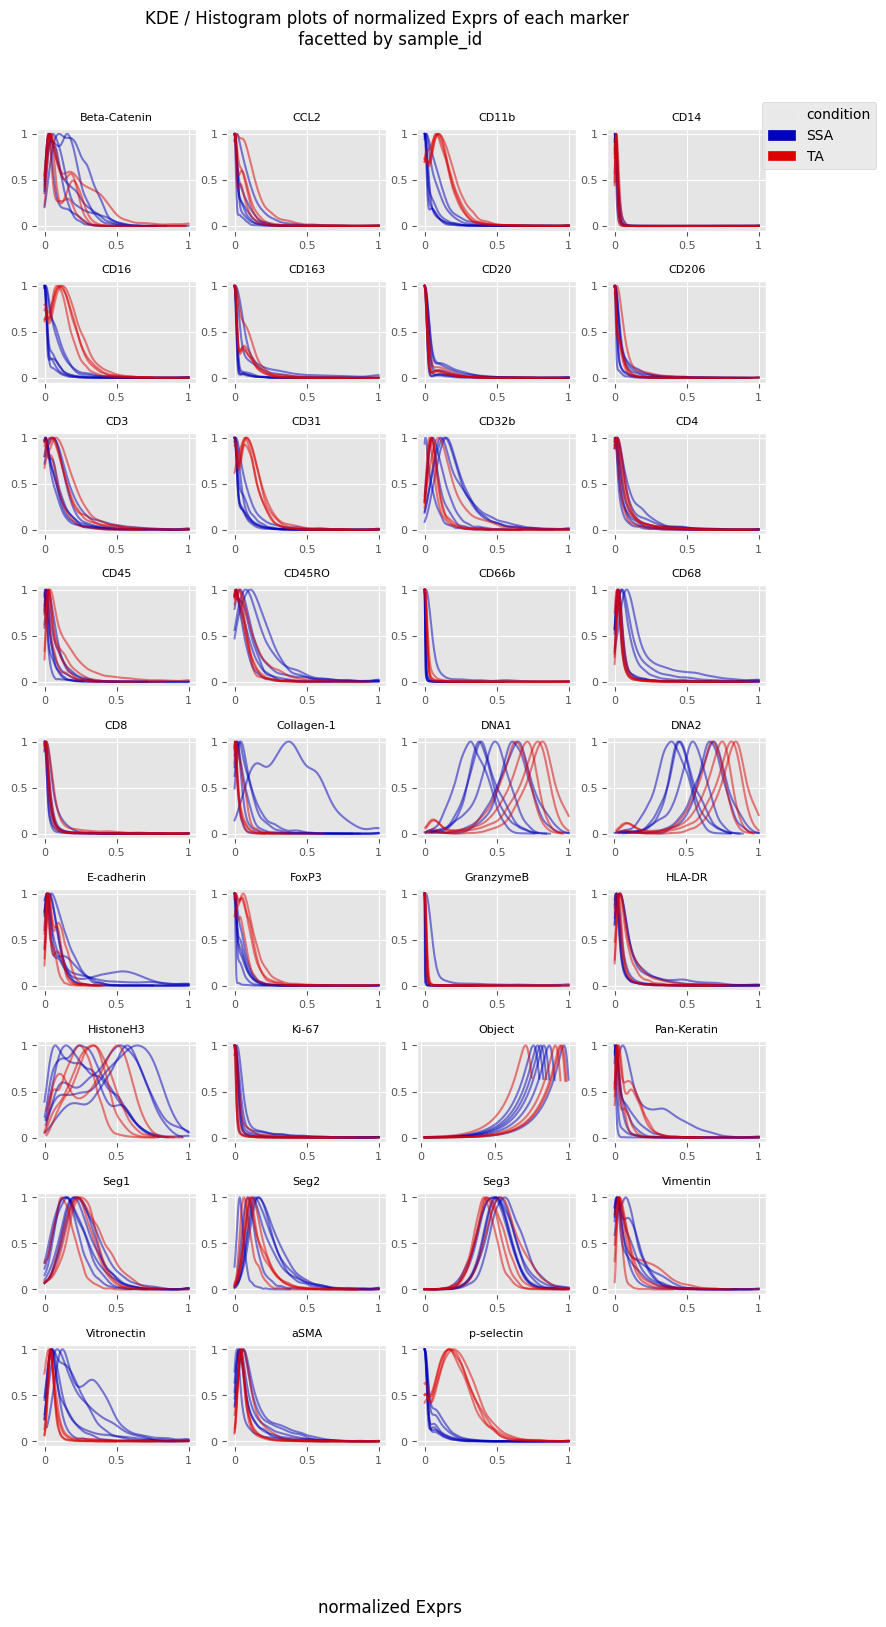

In [10]:
fig = Analysis_experiment.plot_ROI_histograms(filename = "sample_id_histo", color_by = "condition")
fig

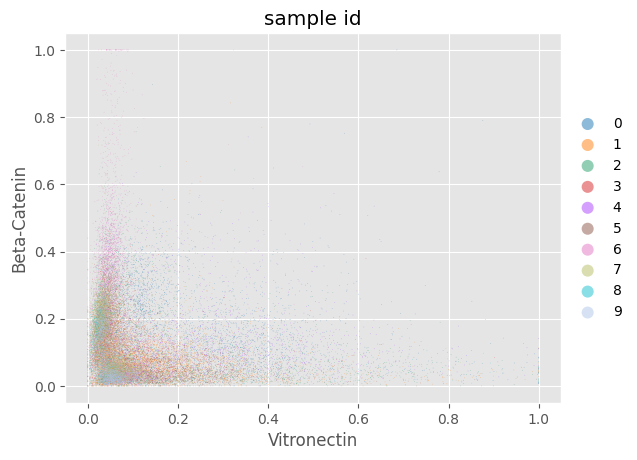

In [11]:
fig = Analysis_experiment.plot_scatter(antigen1 = "Vitronectin", antigen2 = "Beta-Catenin", hue = "sample_id")
fig

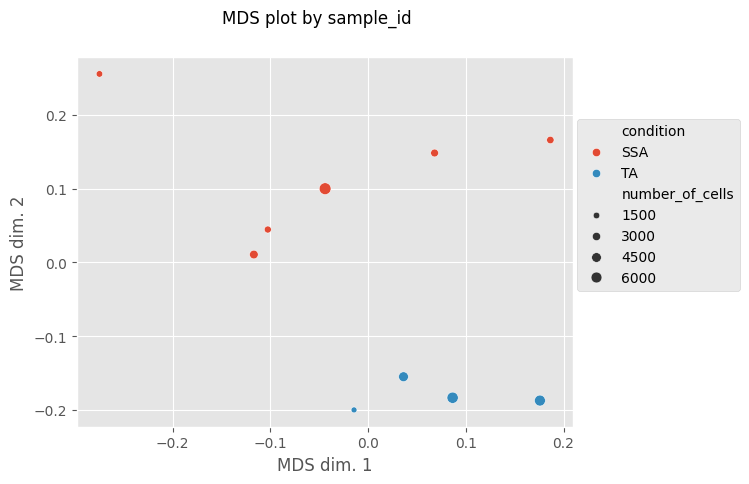

In [12]:
fig, MDS_df = Analysis_experiment.plot_MDS(filename = "MDS", marker_class = "type", color_by = "condition", print_stat = True)
fig

## Clustering Cells by FlowSOM & visualizing cluster characteristics

In [13]:
'''
Since I don't plan on dropping any of the sample_id's I will proceed with the FlowSOM:
'''

fs = Analysis_experiment.do_flowsom(n_clusters = 20, XY_dim = 10, rlen = 50, seed = 1234)

C:\Users\benca\miniforge3\envs\main\lib\site-packages\mudata\_core\mudata.py:1531: FutureWarning: From 0.4 .update() will not pull obs/var columns from individual modalities by default anymore. Set mudata.set_options(pull_on_update=False) to adopt the new behaviour, which will become the default. Use new pull_obs/pull_var and push_obs/push_var methods for more flexibility.
  self._update_attr("var", axis=0, join_common=join_common)
C:\Users\benca\miniforge3\envs\main\lib\site-packages\mudata\_core\mudata.py:1429: FutureWarning: From 0.4 .update() will not pull obs/var columns from individual modalities by default anymore. Set mudata.set_options(pull_on_update=False) to adopt the new behaviour, which will become the default. Use new pull_obs/pull_var and push_obs/push_var methods for more flexibility.
  self._update_attr("obs", axis=1, join_common=join_common)
2025-10-23 10:17:26.221 | DEBUG    | flowsom.main:__init__:82 - Reading input.
2025-10-23 10:17:26.245 | DEBUG    | flowsom.main

In [14]:
# svg_fig_path = Analysis_experiment.plot_facetted_heatmap(filename = "facetted_heatmap", subsetting_column = "sample_id", groupby_column = "metaclustering", marker_class = "type", number_of_columns = 3, analysis_anndata = None)

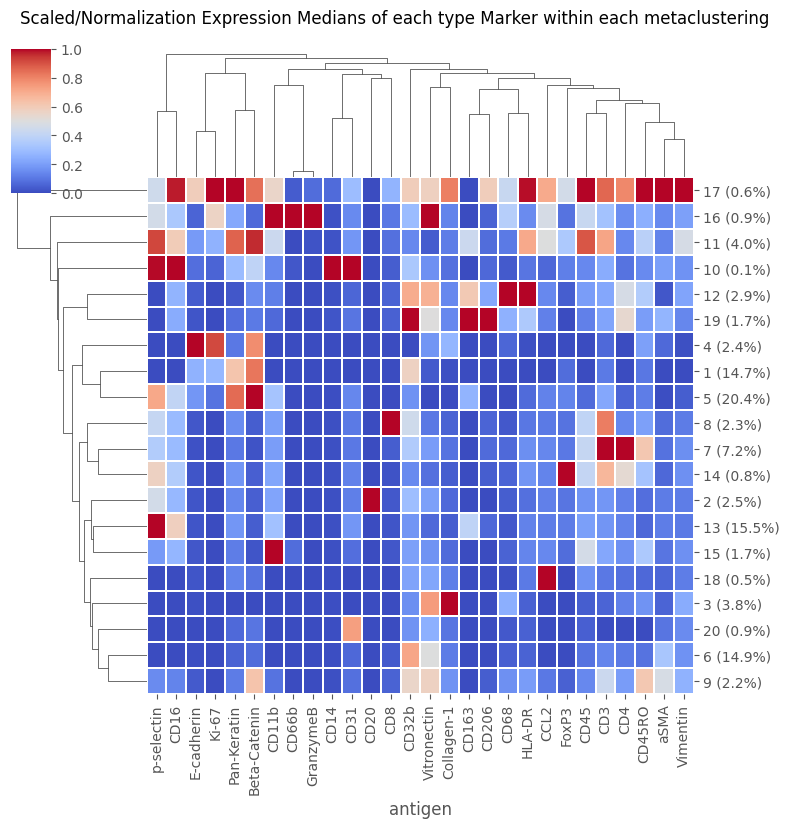

In [15]:
'''
Now, will plot various ways of examining the clustering we've created:
'''
fig = Analysis_experiment.plot_medians_heatmap(filename = "heatmap_metaclustering", marker_class = "type", groupby = "metaclustering", figsize = (8,8))
fig

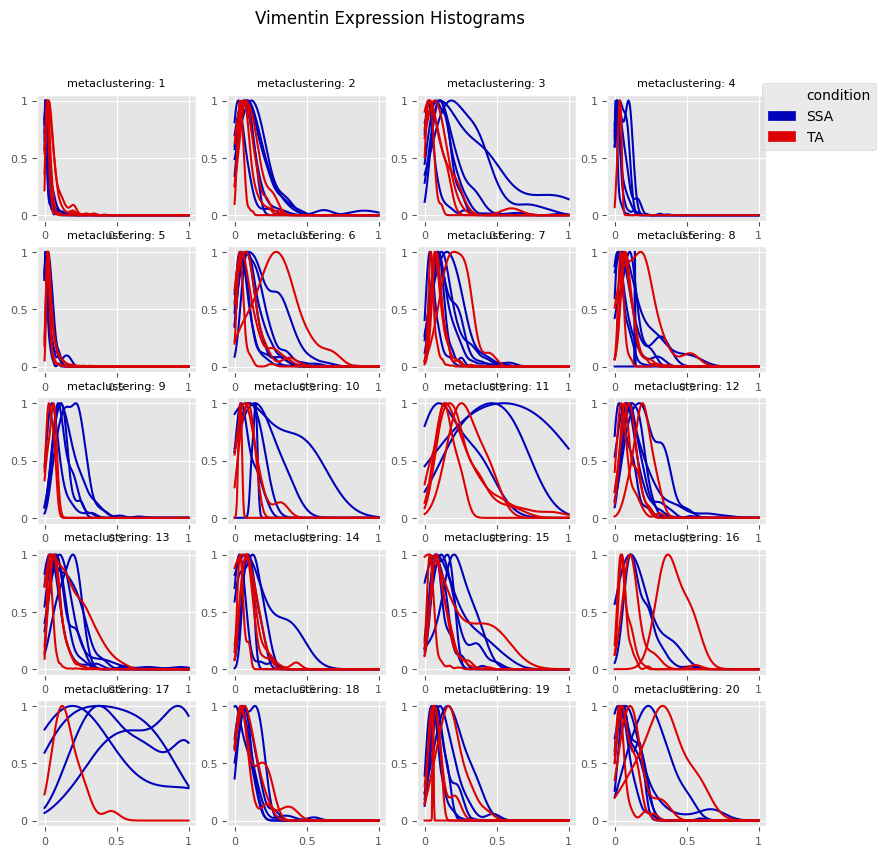

In [16]:
fig = Analysis_experiment.plot_cluster_histograms(filename = "vimentin_kde_by_cluster", groupby_column = 'metaclustering', antigen = "Vimentin")
fig

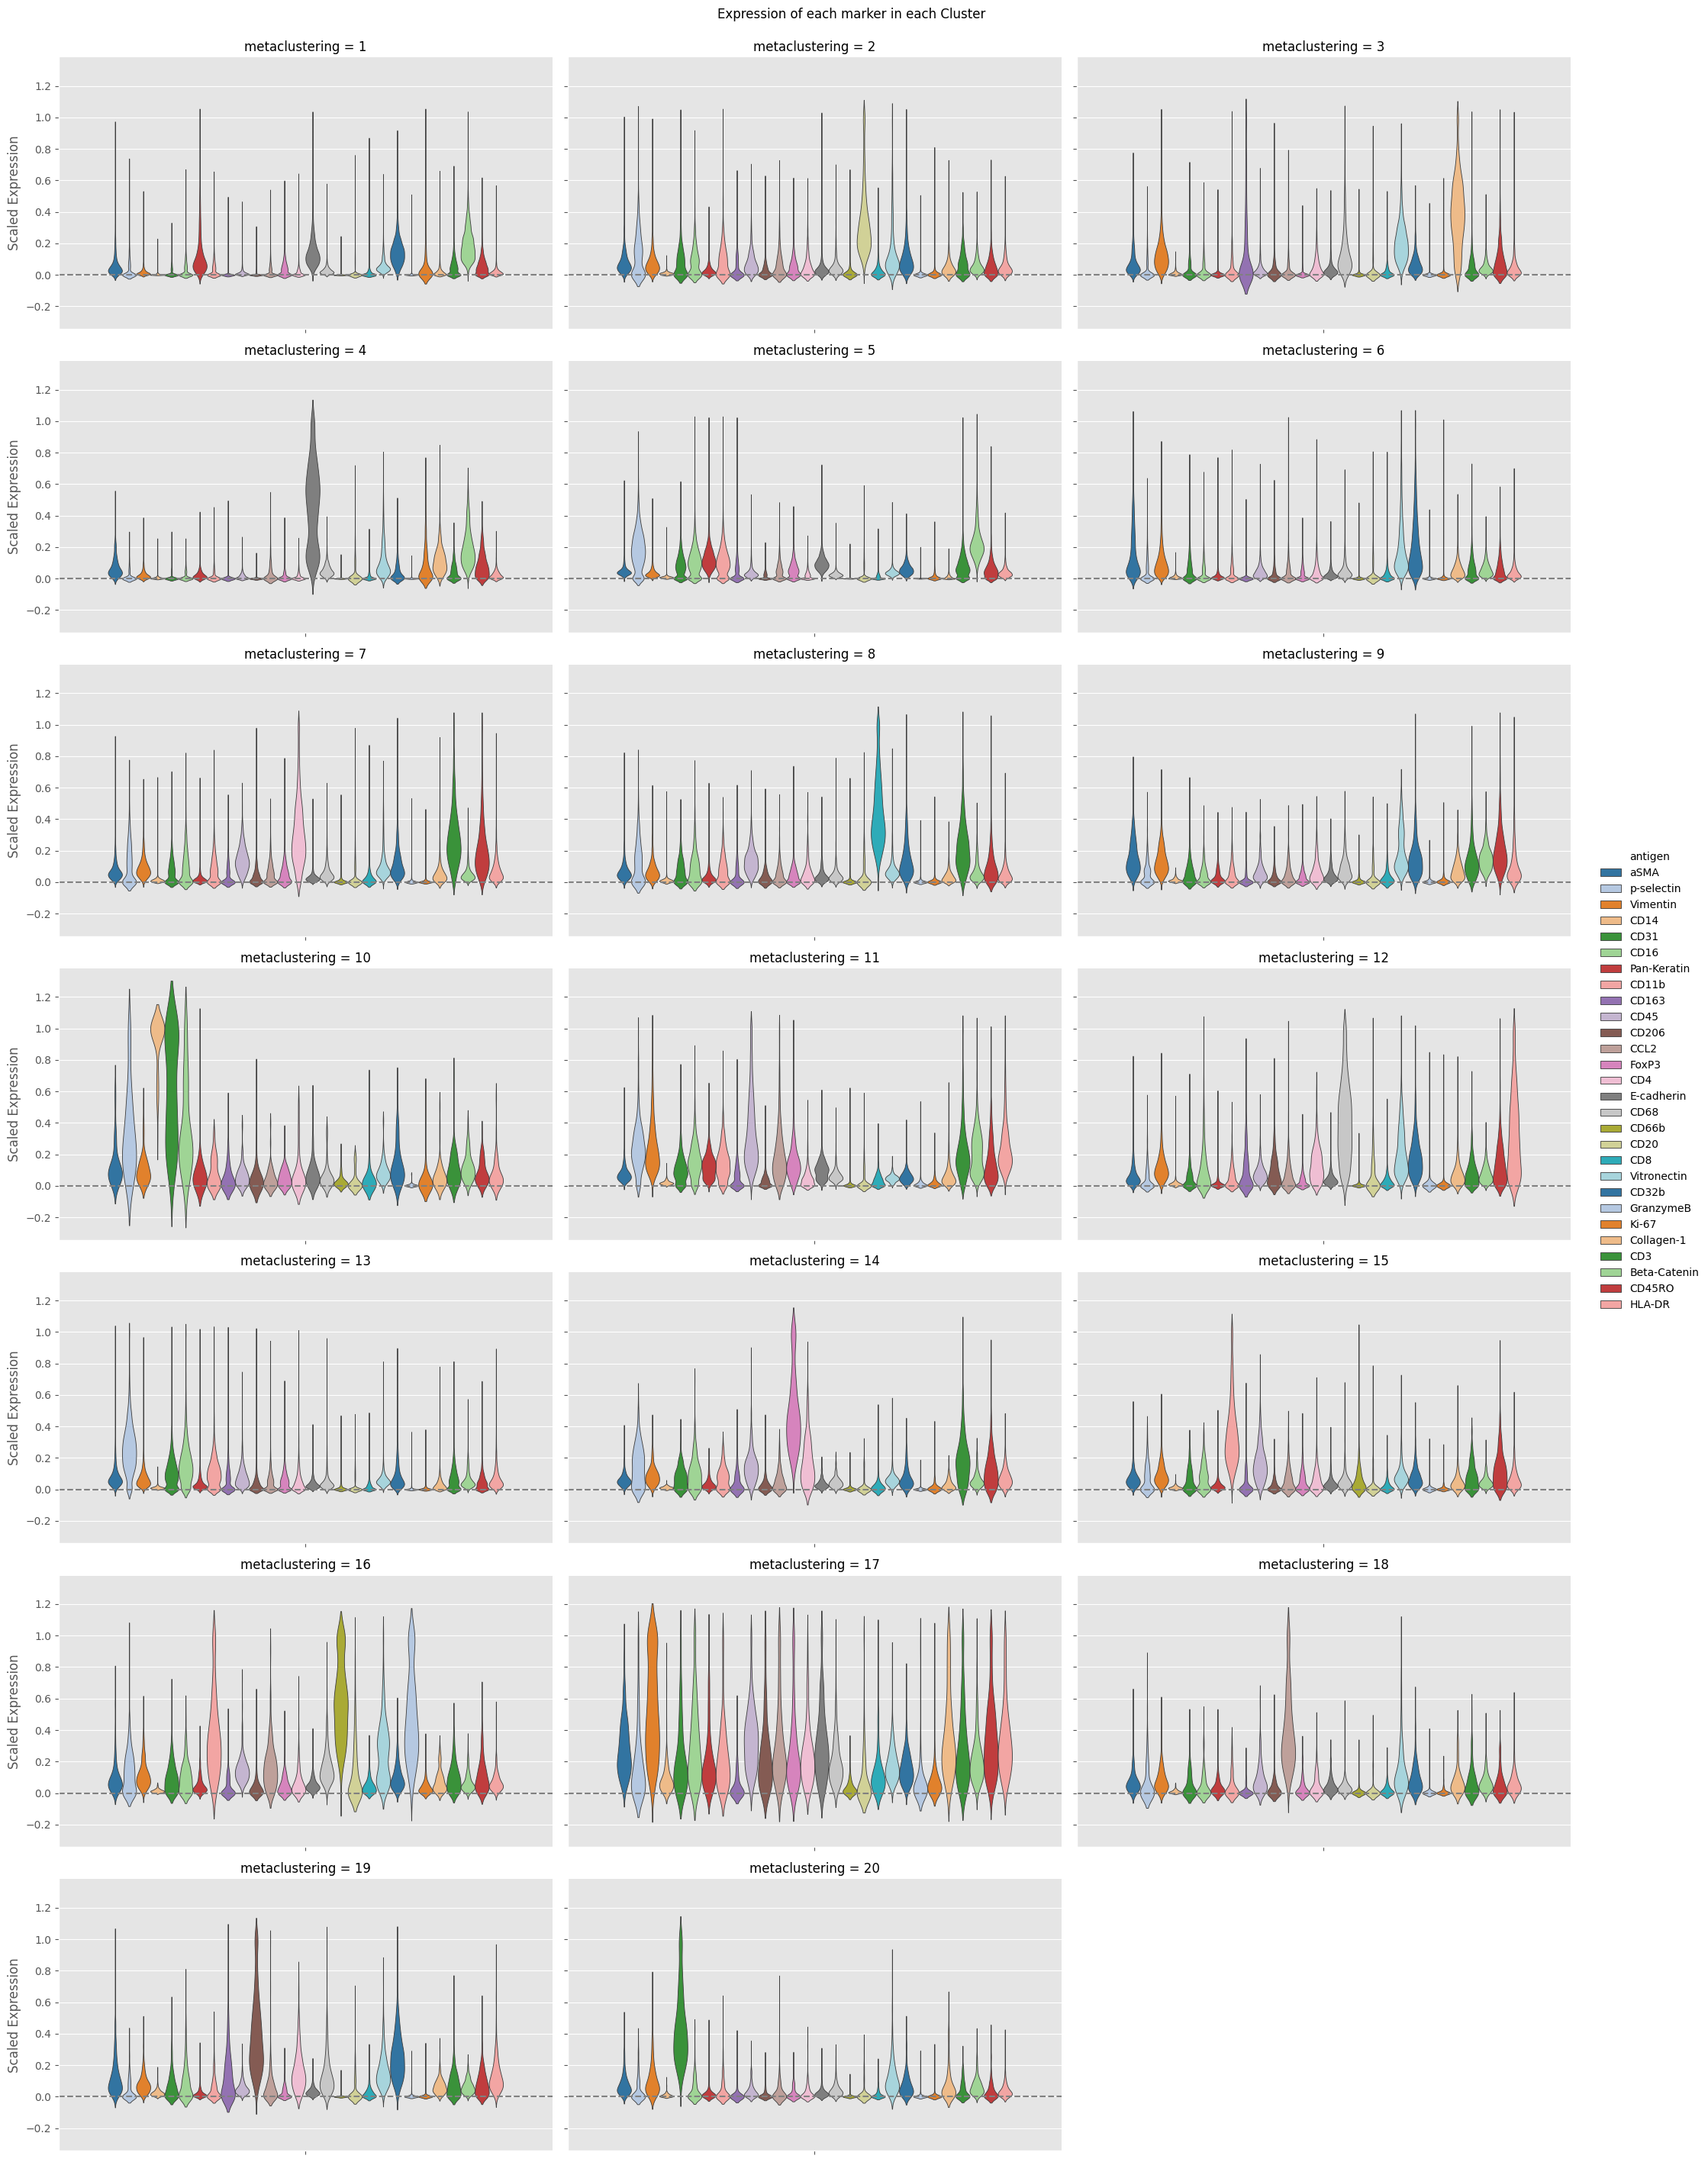

In [17]:
fig = Analysis_experiment.plot_cluster_distributions(filename = "cluster_expression", groupby_column = "metaclustering", marker_class = 'type', 
                                    plot_type = "violin", comp_type = "raw")
fig

## Cluster comparison Statistics

,F_statistic,p_values,FDR_corrected,Difference in expression mean,st_error
CD20,551.300000,1.165000e-57,2.800000e-24,0.388500,0.051750
Vitronectin,6.484000,1.169000e-02,1.636000e-01,0.082550,0.047490
CD3,2.577000,1.101000e-01,6.540000e-01,-0.046660,0.008324
Beta-Catenin,2.359000,1.263000e-01,6.540000e-01,-0.034550,0.008823
CD45RO,2.072000,1.517000e-01,6.540000e-01,-0.042090,0.011080
CD4,1.400000,2.383000e-01,6.540000e-01,-0.031370,0.004721
Pan-Keratin,1.338000,2.488000e-01,6.540000e-01,-0.026900,0.006542
E-cadherin,1.317000,2.526000e-01,6.540000e-01,-0.033910,0.006881
HLA-DR,1.208000,2.732000e-01,6.540000e-01,-0.031710,0.008501
CD45,1.030000,3.114000e-01,6.540000e-01,-0.025370,0.009934


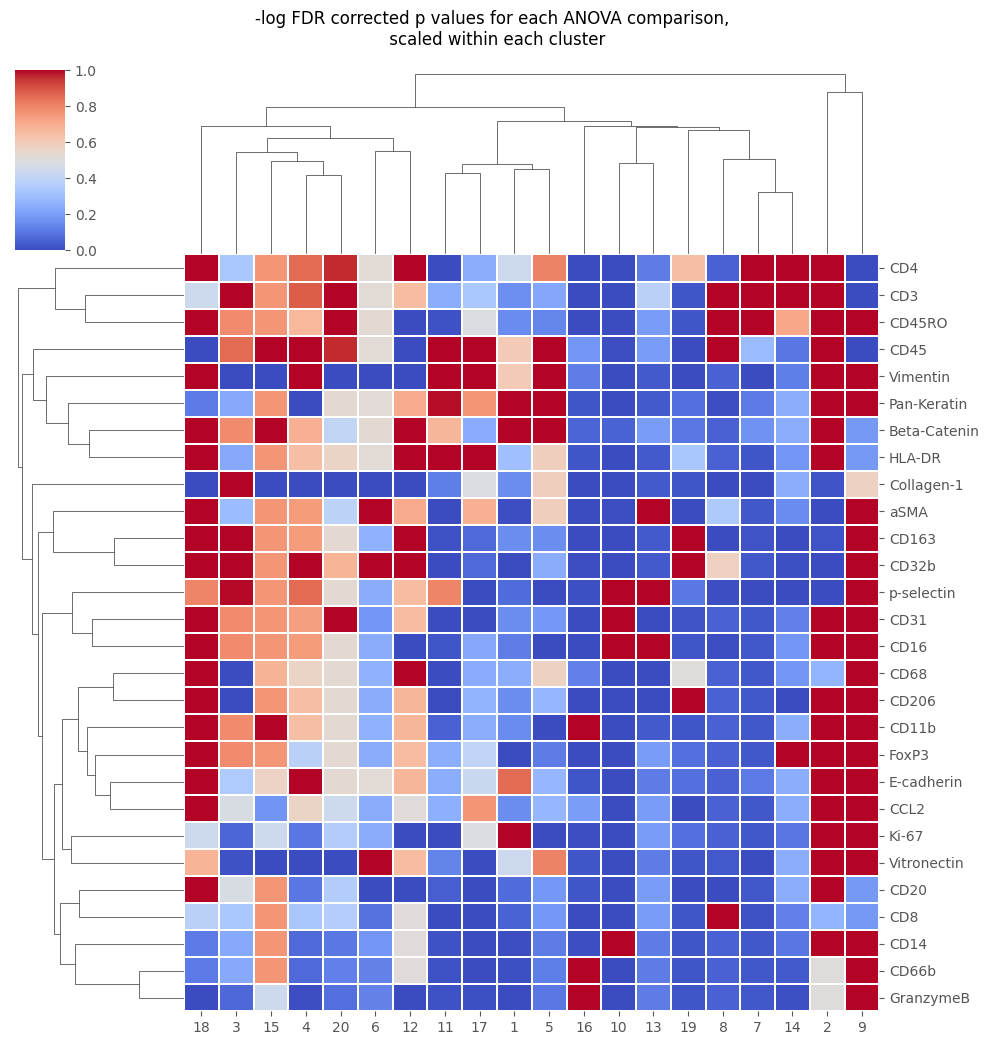

In [18]:
stats_out = Analysis_experiment.do_cluster_stats(groupby_column = "metaclustering", marker_class = 'type')
cluster_to_examine = 2
display(stats_out[cluster_to_examine])   ## or display(Analysis_experiment.df_out_dict[cluster_to_examine]) 
fig = Analysis_experiment.plot_cluster_stats(filename = "cluster_stat_heatmap", statistic = "FDR_corrected")
fig

In [19]:
'''While the functions that do cluster comparison are only used for cell groupings in the GUI, it is also possible to do the same cluster comparison using any other grouping of the data -- 
including condition: 
'''

stats_out = Analysis_experiment.do_cluster_stats(groupby_column = "condition", marker_class = 'type')    ## can also perform the same calculation using treatment condition as the comparator instead of clusters
display(stats_out['SSA']) 

,F_statistic,p_values,FDR_corrected,Difference in expression mean,st_error
p-selectin,385.100000,4.729000e-08,0.000001,-0.168100,0.005314
CD16,41.590000,1.986000e-04,0.002780,-0.090070,0.009307
CD11b,31.530000,5.016000e-04,0.003882,-0.072950,0.009510
CD31,30.570000,5.546000e-04,0.003882,-0.057250,0.006950
FoxP3,14.140000,5.537000e-03,0.031010,-0.042930,0.006364
Vitronectin,9.155000,1.642000e-02,0.076610,0.110000,0.028950
CD45,4.378000,6.975000e-02,0.279000,-0.042980,0.007915
E-cadherin,3.709000,9.030000e-02,0.316100,0.047020,0.018600
CD68,3.294000,1.071000e-01,0.333200,0.059020,0.025920
CD45RO,2.305000,1.675000e-01,0.448200,0.041670,0.020200


## Dimensionality Reduction: UMAP and PCA

These can assist in performing a merging / annotation, but also can be performed after merging as well.

In [20]:
'''
Generating UMAP and PCA plots:
'''
Analysis_experiment.do_UMAP(marker_class = "type", cell_number = 1000, seed = 0)

C:\Users\benca\miniforge3\envs\main\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


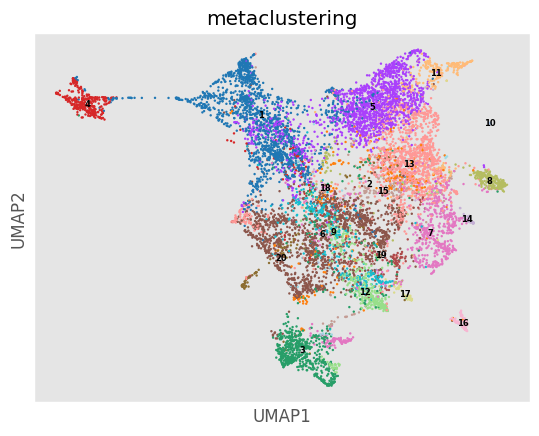

In [21]:
Analysis_experiment.plot_UMAP(filename = "umap", color_by = 'metaclustering', palette = None, legend_loc = 'on data', legend_fontsize = 6)

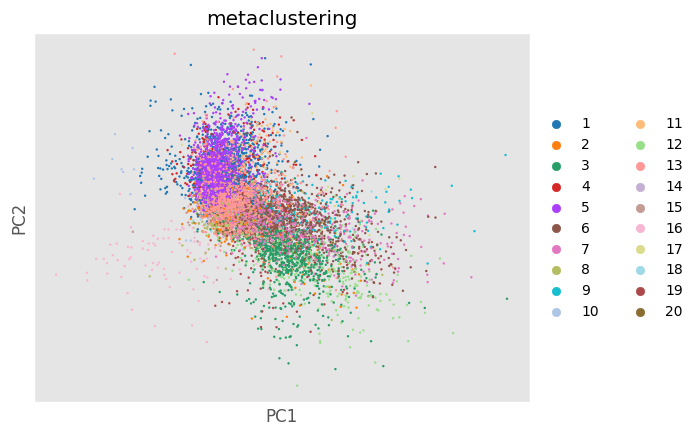

In [22]:
Analysis_experiment.do_PCA(marker_class = "type", cell_number = 1000, seed = 0)
fig = Analysis_experiment.plot_PCA(filename = "pca", color_by = 'metaclustering', palette = None)
fig

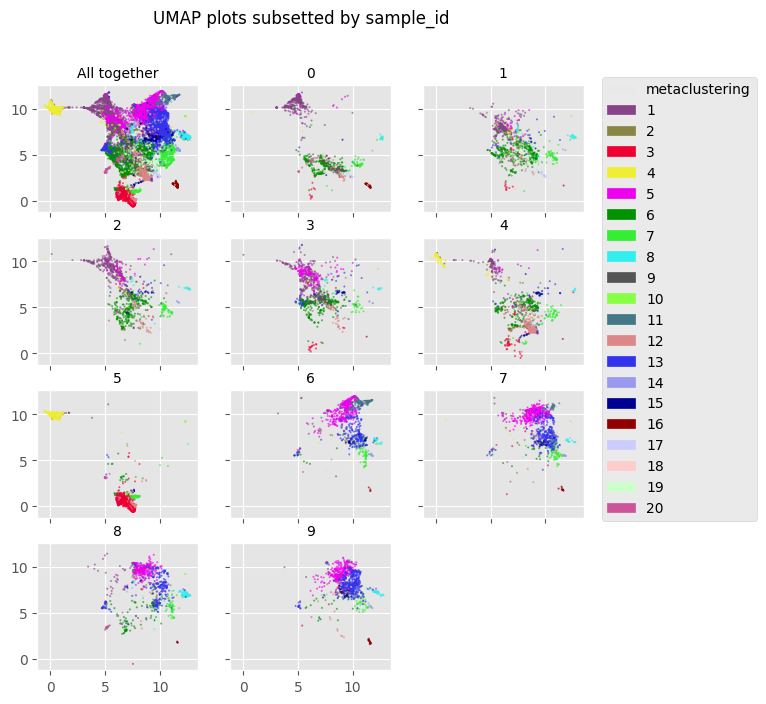

In [23]:
fig = Analysis_experiment.plot_facetted_DR(filename = "facetted_umap", color_by = "metaclustering", subsetting_column = "sample_id", 
                                    number_of_columns = 3, color_bank = None, kind = "UMAP")
fig

## Cluster Merging and Annotation

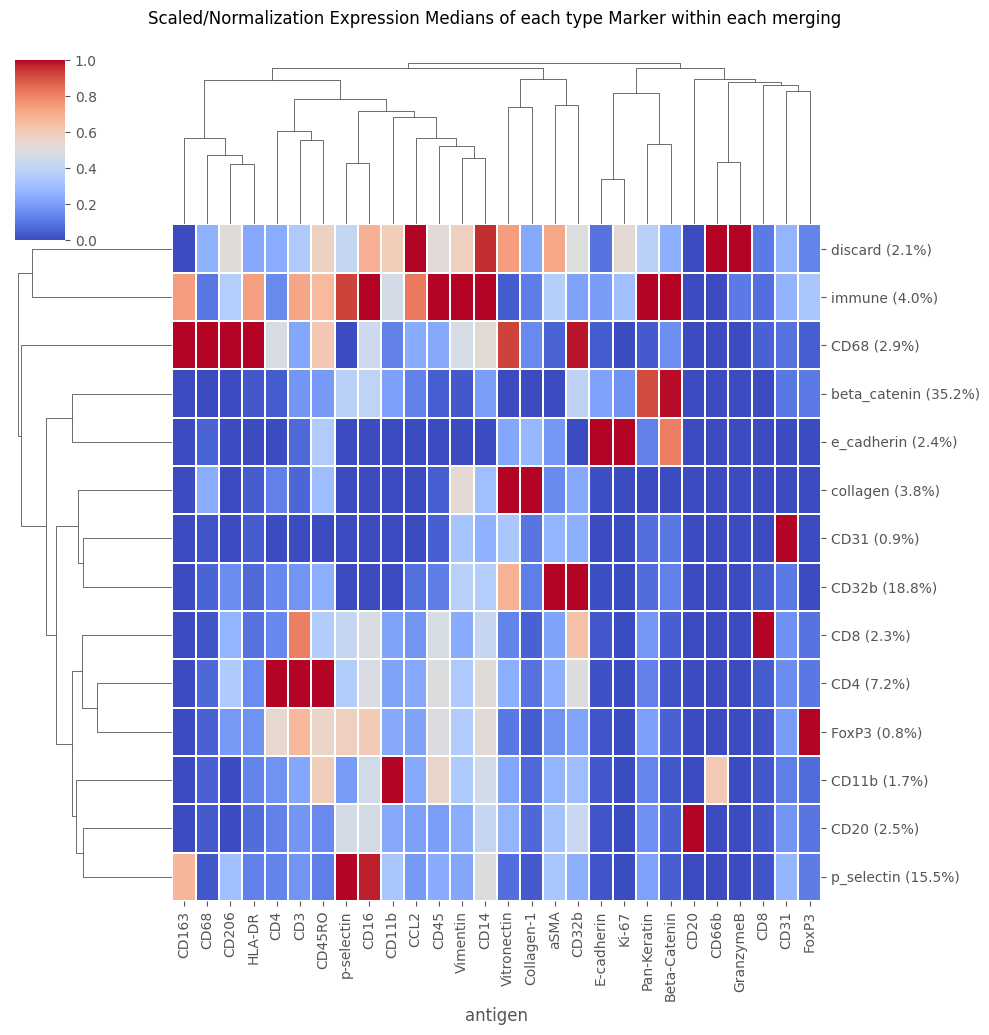

In [24]:
'''
Now we can do a cluster merging

This requires setting up a table where we manually annotate the biological labels of each of the numbered metaclusters
'''
#manual_annotations = ['e_cadherin', 'vitronectin', 'CD68', 'beta_catenin', 'beta_catenin', 'beta_catenin', 'beta_catenin', 'collagen', 'CD32b', 'Cd11b', 
#                      'CD8', 'CD4', 'aSMA', 'CD31', 'beta_catenin', 'CD31', 'discard', 'FoxP3', 'p_selectin', 'discard']

manual_annotations = ['beta_catenin', 'CD20', 'collagen', 'e_cadherin', 'beta_catenin', 'CD32b', 'CD4', 'CD8', 'CD32b', 'discard', 
                      'immune', 'CD68', 'p_selectin', 'FoxP3', 'CD11b', 'discard', 'discard', 'discard', 'CD32b', 'CD31']

merging_table = pd.DataFrame()
merging_table['original_cluster'] = Analysis_experiment.data.obs['metaclustering'].astype('int').sort_values().unique()
merging_table['new_cluster'] = manual_annotations

mergings_sub_folder = Analysis_experiment.directory + "/mergings"
if not os.path.exists(mergings_sub_folder):
    os.mkdir(mergings_sub_folder)
    
merging_table.to_csv(mergings_sub_folder + "/merging.csv", index = False)

Analysis_experiment.do_cluster_merging(mergings_sub_folder + "/merging.csv")
fig = Analysis_experiment.plot_medians_heatmap(filename = "heatmap_merging", marker_class = "type", groupby = "merging")
fig

C:\Users\benca\miniforge3\envs\main\lib\site-packages\seaborn\_core\plot.py:1406: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.004593477262287551 0.013780431786862656 0.018373909049150206
 0.33210840606339 0.06522737712448323 0.034451079467156635
 0.011483693155718878 0.0022967386311437757 0.4042259990813045
 0.015617822691777675 0.08589802480477722 0.0036747818098300414
 0.00045934772622875517 0.0078089113458888375 0.0035758492642002475
 0.021042497593178378 0.01347820107275478 0.4383166001925457
 0.07949387979645166 0.019942236281116764 0.028744326777609682
 0.0030257186081694403 0.28991885572823545 0.022417824233255397
 0.032045110713794525 0.02489341218539403 0.00027506532801540364
 0.022830422225278504 0.01768346595932803 0.02564102564102564
 0.008841732979664015 0.3132920719127616 0.06395520188623637
 0.04774535809018567 0.022104332449160036 0.00618921308576481
 0.4438549955791335 0.01149425287

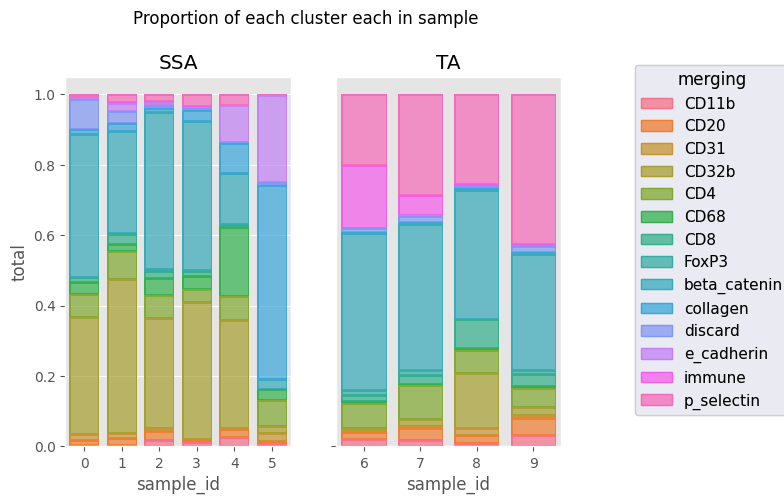

In [25]:
fig = Analysis_experiment.plot_cluster_abundance_1(filename = "abundance_boxplot", groupby_column = "merging")   #, hue = "condition", plot_type = "boxplot")
fig

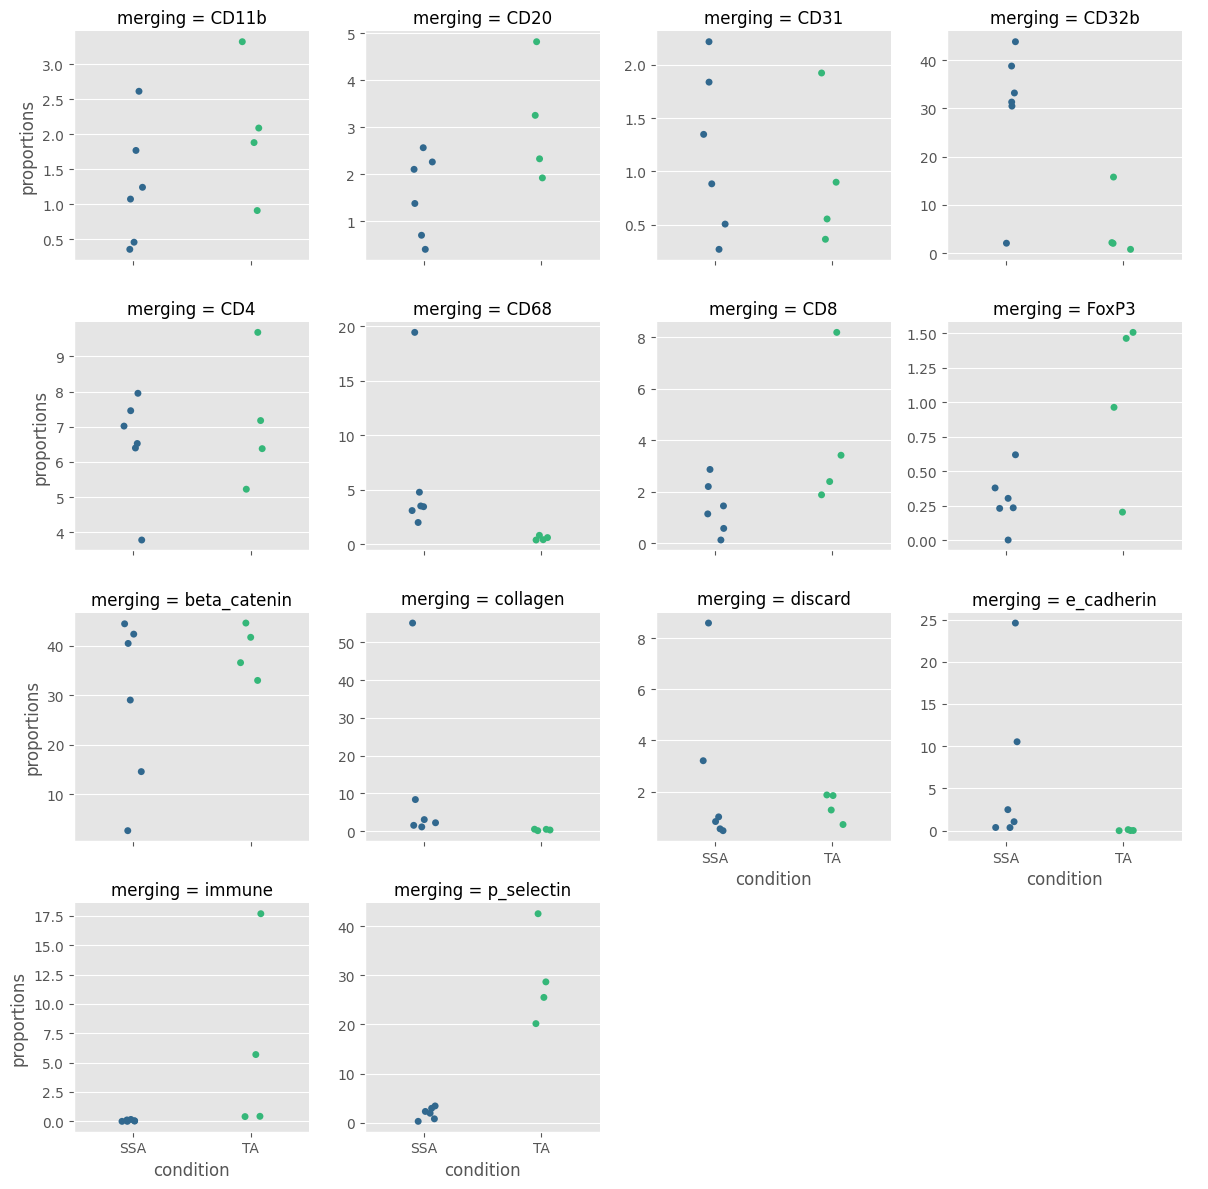

In [26]:
fig = Analysis_experiment.plot_cluster_abundance_2(filename = "abundance_boxplot", groupby_column = "merging", hue = "condition", plot_type = "stripplot")
fig

## Doing Statistics

In [27]:
GLM_result_table = Analysis_experiment.do_count_GLM(variable = "condition", conditions = ["SSA","TA"],
                                                   groupby_column = "metaclustering",  family = "Poisson", filename = "GLM_stats")
GLM_result_table

,comparison,metaclustering,pvalue,p_adj,SSA est. avg,SSA 95% CI +/-,TA est. avg,TA 95% CI +/-
1,SSA vs. TA,metaclustering1,0.0,2.000000e-25,26.9,0.379,2.21,0.115
2,SSA vs. TA,metaclustering6,0.0,2.000000e-25,27.3,0.381,2.11,0.112
16,SSA vs. TA,metaclustering13,0.0,2.000000e-25,2.08,0.105,29.2,1.53
7,SSA vs. TA,metaclustering5,0.0,2.000000e-25,3.47,0.136,37.9,1.55
12,SSA vs. TA,metaclustering3,2.07e-119,2.000000e-25,7.08,0.194,0.33,0.0437
10,SSA vs. TA,metaclustering12,5.1e-103,2.000000e-25,5.29,0.168,0.517,0.0559
11,SSA vs. TA,metaclustering19,5.58e-61,2.000000e-25,3.13,0.129,0.264,0.0398
19,SSA vs. TA,metaclustering11,3e-56,2.000000e-25,0.0533,0.0172,8.03,2.59
15,SSA vs. TA,metaclustering4,3.69e-44,2.000000e-25,4.63,0.157,0.055,0.0178
9,SSA vs. TA,metaclustering9,1.21e-42,2.000000e-25,4.28,0.151,0.055,0.0178


In [28]:
variable = 'condition'
conditions =  list(Analysis_experiment.data.obs[variable].unique())              #### if all conditions are going to be looked at, as in this example, you can pass in and empty list instead 
ouput_df = Analysis_experiment.do_abundance_ANOVAs(groupby_column = 'metaclustering', conditions = conditions)
ouput_df

,f statistics,p_value,p_adj,SSA mean %,SSA stdev,TA mean %,TA stdev
13,50.88000,0.000099,0.001135,1.9290,1.21400,29.22000,9.55200
5,48.89000,0.000113,0.001135,4.2140,6.04900,34.87000,7.87800
6,8.78600,0.018030,0.105500,22.8600,11.35000,4.39400,5.80100
14,8.02200,0.022070,0.105500,0.2939,0.20340,1.03500,0.60720
1,7.38100,0.026380,0.105500,24.6600,14.39000,4.05100,4.79900
2,4.94900,0.056760,0.184000,1.5690,0.88350,3.08000,1.28500
9,4.46300,0.067600,0.184000,5.2570,4.81300,0.06777,0.04377
8,4.23500,0.073590,0.184000,1.4020,1.01600,3.97900,2.88400
11,3.46500,0.099700,0.221600,0.0589,0.06666,6.05000,8.14200
12,2.63200,0.143400,0.286800,6.0450,6.62900,0.55510,0.19850


In [29]:
ouptut_df = Analysis_experiment.do_state_exprs_ANOVAs( filename = "state_exprs_ANOVA_table",       
                                 marker_class = "none", 
                                 groupby_column = 'metaclustering', 
                                 variable = 'condition', 
                                 statistic = 'mean')

In [30]:
ouptut_df

,antigen,metaclustering,p_value,p_adj,F statistic,avg SSA mean exprs,SSA avg stdev,avg TA mean exprs,TA avg stdev
122,Seg3,3,0.00891,0.1983,11.790000,0.3392,0.26840,0.4799,0.04512
4,DNA1,5,0.01171,0.1983,10.560000,0.4320,0.11270,0.6380,0.08775
7,DNA1,8,0.01291,0.1983,10.140000,0.3133,0.26080,0.6831,0.17120
127,Seg3,8,0.01425,0.1983,9.730000,0.3006,0.25650,0.4493,0.05539
27,DNA2,8,0.01473,0.1983,9.593000,0.3503,0.28560,0.7206,0.15490
...,...,...,...,...,...,...,...,...,...
86,Seg1,7,0.96940,0.9970,0.001569,0.2344,0.05965,0.1815,0.04308
111,Seg2,12,0.97860,0.9970,0.000764,0.1760,0.08552,0.1592,0.03671
87,Seg1,8,0.99040,0.9970,0.000154,0.1760,0.14860,0.2117,0.09686
108,Seg2,9,0.99620,0.9970,0.000024,0.3037,0.17850,0.1106,0.04424


## Exporting: Saving and Reloading Cell Clsuterings / Annotations

In [31]:
'''
We can export a clustering -- it can be reloaded into the same Analysis later, so we don't have to re-do our clustering algorithm
'''
save_type_options = ["metaclustering","merging","classification","leiden"]  ## these are the options naturally produced by PalmettoBUG

## and index with this command:
export, path = Analysis_experiment.export_clustering(groupby_column = "merging", identifier = "")

In [32]:
'''
Reloading an exported clustering is easy:

Note that if the condition, patient_id columns in self.data.obs or the data itself (self.data.X) have changed since when the clustering was first loaded
a caution message will be printed (while still adding the clustering). These messages are to alert you that the state of these columns / the data 
does not match the state of those columns / the data when you originally saved the clustering. This can happen, for example, if you scaled the data before 
clustering and then later reopened the Analysis & forgot to scale the data again before reloading the clustering. 

These caution messages, even though they don't block the reloading of the cell clustering, are meant to alert you to unusual changes in the data and 
give you a chance to fix problems / mistakes if those changes were unintentional. 
'''

Analysis_experiment.load_clustering(path = Analysis_experiment.clusterings_dir + "/merging.csv")

## Exporting the entire Single Cell Data as a CSV

First, export the entire dataset to a CSV file.

The data is what is currently inside the PalmettoBUG Analysis object (effectively, self.data.X + self.data.obs).
If the include_marker_class_row parameter is set to True (which should ONLY be the case if you intend to reload the CSV into PalmettoBUG), then the marker_class of each channel (type/state/none, etc. from self.data.var) will be included as numbers in the last row of the CSV. 

NOTE: what is exported is the CURRENT state of the data -- it will reflect any changes made to the data like scaling, batch correction, or dropping a sample.

When a filename is specified, as in these examples, a CSV file is automatically written to the expected PalmettoBUG location on the disk. However, if filename is left as the default value of None, then only the pandas dataframe will be returned -- allowing the user to do further calculations in Python before exporting with pd.to_csv(). 

In [33]:
full_data_export = Analysis_experiment.export_data(filename = "CSVforReload", include_marker_class_row = False)  

## Note: the include_marker_class_row parameter should be True ONLY if you intend on reloading the data into PalmettoBUG itself (say from one installation of PalmettoBUG to another, 
## It includes a row at the bottom of the data giving the marker_class (type / state/ none, etc.) of each channel
full_data_export

antigen,Object,aSMA,p-selectin,Vimentin,CD14,CD31,CD16,Pan-Keratin,CD11b,CD163,...,index,sample_id,file_name,patient_id,condition,clustering,metaclustering,merging,scaling,masks_folder
0,0.024929,0.284928,0.000000,0.000000,0.000000,0.000000,0.000000,0.023377,0.000000,0.000000,...,0,0,CRC_1_ROI_001.ome.fcs,7139,SSA,64,18,discard,%quantile99.9,C:/Users/Default/Desktop/Example_IMC/masks/exa...
1,0.048936,0.038894,0.266123,0.033602,0.000000,0.000000,0.000000,0.302601,0.000000,0.000000,...,1,0,CRC_1_ROI_001.ome.fcs,7139,SSA,9,1,beta_catenin,%quantile99.9,C:/Users/Default/Desktop/Example_IMC/masks/exa...
2,0.071368,0.040151,0.208277,0.052851,0.009086,0.000000,0.000000,0.550454,0.249777,0.000000,...,2,0,CRC_1_ROI_001.ome.fcs,7139,SSA,4,1,beta_catenin,%quantile99.9,C:/Users/Default/Desktop/Example_IMC/masks/exa...
3,0.091925,0.026662,0.000000,0.019532,0.008359,0.000000,0.000000,0.479541,0.000000,0.000000,...,3,0,CRC_1_ROI_001.ome.fcs,7139,SSA,4,1,beta_catenin,%quantile99.9,C:/Users/Default/Desktop/Example_IMC/masks/exa...
4,0.110583,0.042182,0.126066,0.012851,0.005500,0.000000,0.000000,0.505777,0.000000,0.000000,...,4,0,CRC_1_ROI_001.ome.fcs,7139,SSA,4,1,beta_catenin,%quantile99.9,C:/Users/Default/Desktop/Example_IMC/masks/exa...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36922,0.944983,0.123140,0.000000,0.033898,0.011610,0.000000,0.000000,0.023377,0.088481,0.000000,...,36922,9,CRC_3_ROI_004.ome.fcs,7139,TA,53,6,CD32b,%quantile99.9,C:/Users/Default/Desktop/Example_IMC/masks/exa...
36923,0.945010,0.046166,0.000000,0.158551,0.000000,0.126720,0.000000,0.016833,0.523257,0.000000,...,36923,9,CRC_3_ROI_004.ome.fcs,7139,TA,67,15,CD11b,%quantile99.9,C:/Users/Default/Desktop/Example_IMC/masks/exa...
36924,0.945037,0.051315,0.281774,0.026245,0.006147,0.186344,0.410744,0.016503,0.220021,0.000000,...,36924,9,CRC_3_ROI_004.ome.fcs,7139,TA,37,13,p_selectin,%quantile99.9,C:/Users/Default/Desktop/Example_IMC/masks/exa...
36925,0.945064,0.036582,0.000000,0.146609,0.010449,0.158396,0.000000,0.074807,0.000000,0.000000,...,36925,9,CRC_3_ROI_004.ome.fcs,7139,TA,15,5,beta_catenin,%quantile99.9,C:/Users/Default/Desktop/Example_IMC/masks/exa...


We can also export simple subsets & groups in the data. This example takes only the sample_id's 1-3, and groups them by unique sample_id, condition, and metaclustering, exporting the mean of each channel in the unique groups.
Valid groupby_columns are columns in self.data.obs.

Note that even though the condition column is redundant with the sample_id column (every sample_id has only one condition associated with it), I include it the groupby_columns so that it will be exported into the final CSV. If the grouping was only on sample_id and metaclustering, then the same numbers and groups would be made, but the condition column would not be in the exported file. You could reconstruct which conditions applied to which smaple_ids but that would be a pain. 

In [34]:
data_table = Analysis_experiment.export_data(filename = "export_clusterings", 
                        subset_columns = ['sample_id'], 
                        subset_types = [[1,2,3]], 
                        groupby_columns = ['sample_id', 'condition', 'metaclustering'],  
                        statistic = 'mean')    

In [35]:
data_table

,sample_id,condition,metaclustering,Object,aSMA,p-selectin,Vimentin,CD14,CD31,CD16,...,CD3,HistoneH3,Beta-Catenin,CD45RO,HLA-DR,DNA1,DNA2,Seg1,Seg2,Seg3
0,1,SSA,1,0.865785,0.074378,0.025356,0.017434,0.003001,0.013077,0.022812,...,0.045610,0.283345,0.131373,0.048128,0.017947,0.385994,0.451117,0.213964,0.147877,0.520604
1,1,SSA,2,0.915665,0.102705,0.040173,0.058384,0.006305,0.045018,0.024729,...,0.048352,0.261299,0.067443,0.059923,0.036391,0.372530,0.434350,0.194065,0.179603,0.460786
2,1,SSA,3,0.959677,0.070690,0.011369,0.054594,0.008238,0.022306,0.023889,...,0.025076,0.196373,0.043492,0.053533,0.057812,0.317394,0.382706,0.115750,0.149198,0.457021
3,1,SSA,4,0.977852,0.070690,0.011630,0.027843,0.004595,0.008147,0.013884,...,0.025758,0.238159,0.091262,0.050077,0.034681,0.332750,0.400282,0.110395,0.124404,0.494553
4,1,SSA,5,0.870571,0.050497,0.034417,0.015222,0.003037,0.024768,0.064789,...,0.046896,0.248695,0.139719,0.038718,0.017525,0.358666,0.425989,0.200307,0.140437,0.512571
5,1,SSA,6,0.875025,0.184356,0.039828,0.075379,0.009501,0.050006,0.035161,...,0.067588,0.293444,0.056406,0.064686,0.047366,0.410455,0.472967,0.207826,0.205702,0.464810
6,1,SSA,7,0.876094,0.085646,0.028891,0.059378,0.008863,0.035516,0.032904,...,0.277323,0.217040,0.040908,0.219001,0.046264,0.436142,0.497079,0.211831,0.320624,0.467062
7,1,SSA,8,0.861211,0.087000,0.033835,0.053460,0.006863,0.044872,0.038071,...,0.227391,0.211267,0.058568,0.111790,0.033965,0.442479,0.502679,0.228747,0.327505,0.499285
8,1,SSA,9,0.868679,0.158468,0.044848,0.083110,0.009266,0.061833,0.028187,...,0.094256,0.428219,0.087834,0.159677,0.059686,0.434145,0.493186,0.222735,0.203026,0.470958
9,1,SSA,10,0.800928,0.160903,0.270435,0.080830,0.946780,0.611559,0.369436,...,0.142266,0.345677,0.083248,0.087618,0.048299,0.471945,0.533911,0.236627,0.277152,0.495039


Dimensionality Reductions can also be exported, in case you want to plot them in a different software or customize the plots in Python.
Note that dimensionality reduction in PalmettoBUG is typically done on a downsampled subset of the data, and not on the whole dataset, so the original cell number (in the full dataset) is included with this exported file.

In [36]:
dimensionality_reduction_export = Analysis_experiment.export_DR(kind = "pca", filename = "PCA")
dimensionality_reduction_export

,PC1,PC2,cell number from original data
0,0.004127,0.017505,1
1,0.013839,0.009227,2
2,-0.000918,0.019784,4
3,0.006597,0.011152,5
4,0.026255,0.011568,6
...,...,...,...
9983,0.006567,0.001004,36909
9984,0.002115,-0.002503,36910
9985,0.004502,0.015096,36916
9986,0.002467,0.000051,36922


In [37]:
## this creates a classy_mask folder with .tiff files for each sample_id/file_name
df = Analysis_experiment.export_clustering_classy_masks(clustering = "merging", identifier = "seed1234")
df

,merging,file_name,label
0,discard,CRC_1_ROI_001.ome.fcs,2
1,beta_catenin,CRC_1_ROI_001.ome.fcs,3
2,beta_catenin,CRC_1_ROI_001.ome.fcs,3
3,beta_catenin,CRC_1_ROI_001.ome.fcs,3
4,beta_catenin,CRC_1_ROI_001.ome.fcs,3
...,...,...,...
36922,CD32b,CRC_3_ROI_004.ome.fcs,4
36923,CD11b,CRC_3_ROI_004.ome.fcs,8
36924,p_selectin,CRC_3_ROI_004.ome.fcs,13
36925,beta_catenin,CRC_3_ROI_004.ome.fcs,3


## Alternative Clustering methods: Leiden and Pixel Classification

NOTE! The cell that use a pixel classifier's output depends on the previous execution of the SupervisedClassifier notebook in the pixel classifier tutorials!

In [38]:
'''
Alternatively, -- there is UMAP-->leiden clustering based cell labels:
'''
Analysis_experiment.do_leiden_clustering(seed = 0, min_dist = 0.1, resolution = 1)

C:\Users\Default\Desktop\PalmettoBUG\palmettobug\Analysis_functions\Analysis.py:962: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(for_fs,


True

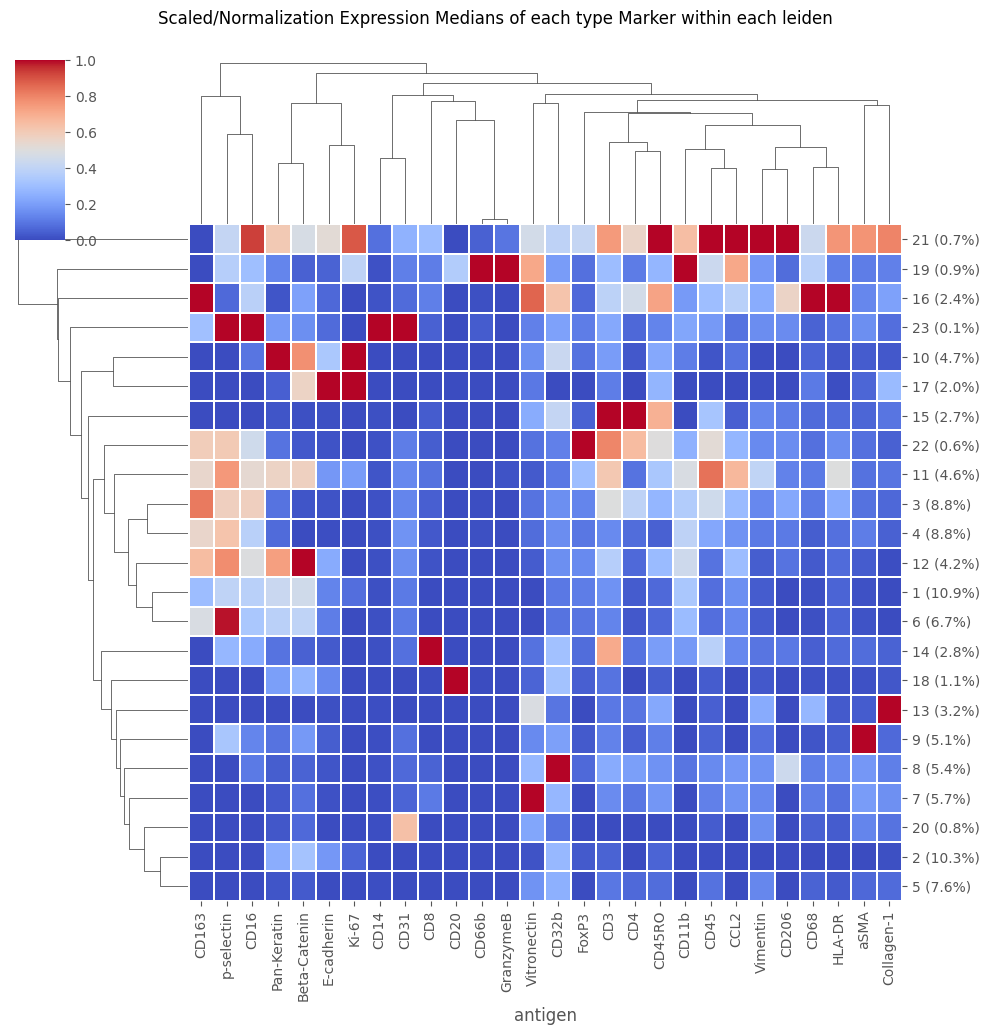

In [39]:
fig = Analysis_experiment.plot_medians_heatmap(filename = "heatmap", marker_class = "type", groupby = "leiden")

fig

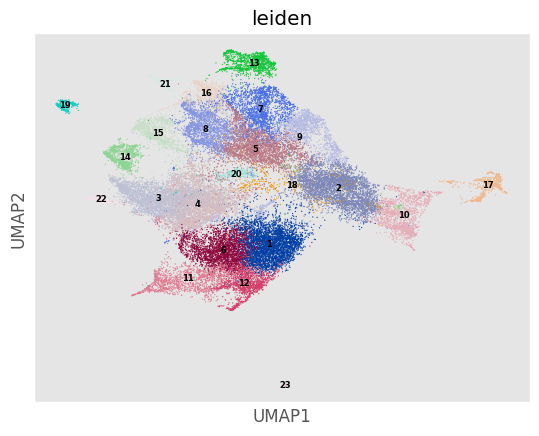

In [40]:
'''Doing a  leiden clustering automatically also creates a UMAP embedding -- but unlike when using the usual do_UMAP method, the leiden UMAP embeds ALL of the cells in the datasetm
not just a downsampled subset.'''
Analysis_experiment.plot_UMAP(filename = "umap", color_by = 'leiden', palette = None, legend_loc = 'on data', legend_fontsize = 6)

## Optional: Pixel Classifiers as a means to cluster cells and loading region properties as cell features

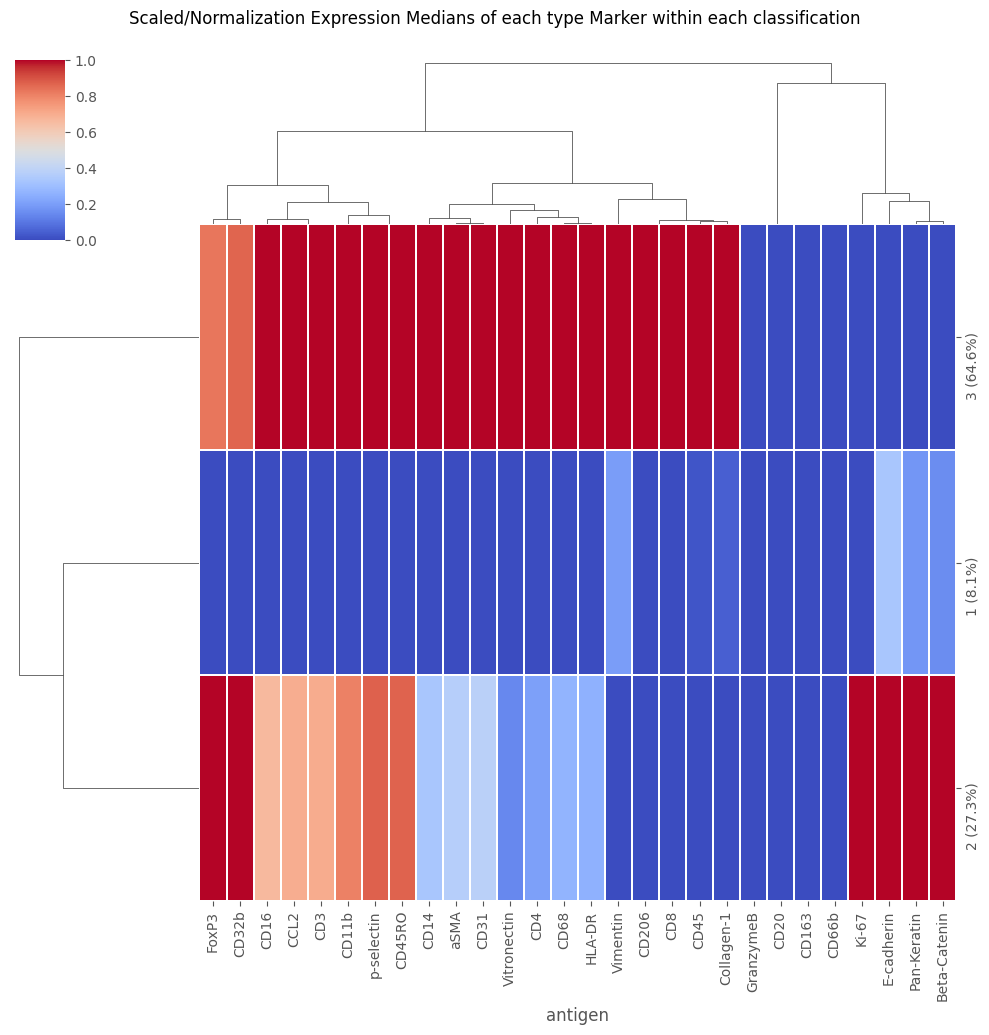

In [41]:
'''
We can load the classy_mask classification as a cell annotation! NOTE: Depends on Supervised Classifier notebook in the pixel classifier tutorials folder!
'''
# load from .csv:
'''The following lines depend on a pixel classifier having been set up & 'classy masks' having been derived from it -- with the output at the indicated path.
GO TO:    _______________ note book to see how these classy masks could be generated.
'''
try:
    classy_mask_folder = f"{my_computer_path}/Example_IMC/classy_masks/My_classy_deepcell_masks"
    cell_classification_paths = [classy_mask_folder + "/" + i for i in os.listdir(classy_mask_folder) if i.find(".csv") != -1]
    selected_path = cell_classification_paths[0]
    Analysis_experiment.load_classification(cell_classifications = selected_path, column = "labels")
    fig = Analysis_experiment.plot_medians_heatmap(filename = "heatmap", marker_class = "type", groupby = "classification")
    display(fig)
except FileNotFoundError:
    print("Did you first make classy cell masks from a supervised classifier in this folder -- as in the SupervisedClassifier Notebook?")

In [42]:
'''
We can also load the region properties calculated for each mask, such as area, perimeter, etc.
and treat these like antigens:
'''
regionprops_panel = Analysis_experiment.load_regionprops()

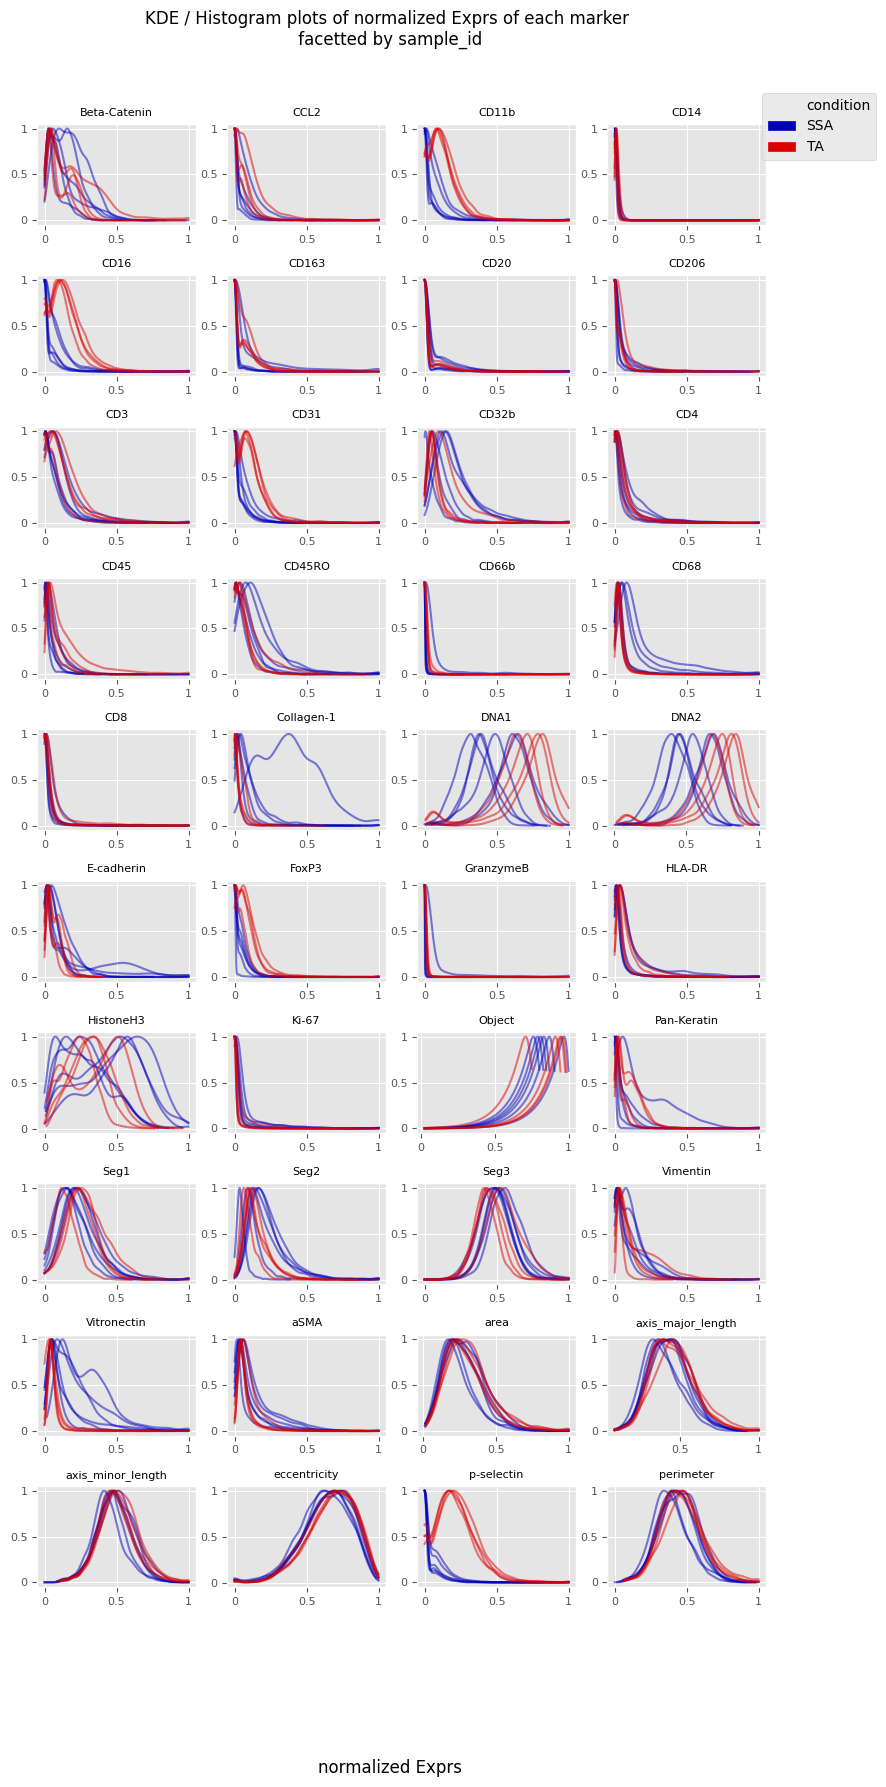

In [43]:
'''
Notice the addition of region properties to the channels -- such as perimeter, area, etc.
'''
fig = Analysis_experiment.plot_ROI_histograms(filename = "sample_id_histo", color_by = "condition")
fig